In [1]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

import tensorflow as tf
from tensorflow.keras import Sequential,datasets
from tensorflow.keras.layers import Dense,Embedding,SimpleRNN,LSTM,GRU,Dropout
from tensorflow.keras.preprocessing import sequence

from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.model_selection import train_test_split


In [2]:
(X_train,y_train),(X_test,y_test) = datasets.imdb.load_data()

print(X_train.shape,y_train.shape)
print(X_test.shape,y_test.shape)

17473536/17464789 [==============================] - 0s 0us/step
(25000,) (25000,)
(25000,) (25000,)


In [3]:
print(X_train[0][:5], X_train[0].__len__())

[1, 14, 22, 16, 43] 218


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


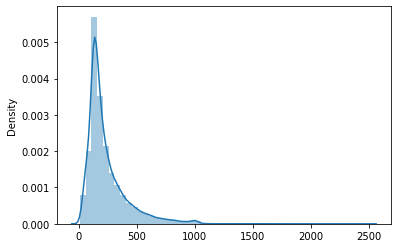

In [4]:
sns.distplot(a=[len(x) for x in X_train])

In [5]:
# 정수 4부터가 실제 IMDB 리뷰 데이터셋에서 빈도수가 가장 높은 영단어를 나타낸다.
words = datasets.imdb.get_word_index() # 저장된 값에 +3을 해야 실제 맵핑되는 정수
index_to_word = {}
for i,v in words.items():
    index_to_word[v+3] = i

1654784/1641221 [==============================] - 0s 0us/step


In [6]:
# index to word test
' '.join([index_to_word.get(i,'?') for i in X_train[0]])

"? this film was just brilliant casting location scenery story direction everyone's really suited the part they played and you could just imagine being there robert redford's is an amazing actor and now the same being director norman's father came from the same scottish island as myself so i loved the fact there was a real connection with this film the witty remarks throughout the film were great it was just brilliant so much that i bought the film as soon as it was released for retail and would recommend it to everyone to watch and the fly fishing was amazing really cried at the end it was so sad and you know what they say if you cry at a film it must have been good and this definitely was also congratulations to the two little boy's that played the part's of norman and paul they were just brilliant children are often left out of the praising list i think because the stars that play them all grown up are such a big profile for the whole film but these children are amazing and should b

In [7]:
word_lens = pd.Series([len(x) for x in X_train])
print(word_lens.mean())
print(word_lens.median())
print(word_lens.value_counts().max())

238.71364
178.0
196


In [8]:
set(y_train)

{0, 1}

In [9]:
X_train_with_pad = sequence.pad_sequences(X_train,maxlen=250)
X_test_with_pad = sequence.pad_sequences(X_test,maxlen=250)

In [10]:
def build_model(model_name):
    base = Sequential()
    base.add(Embedding(input_dim=10000,output_dim=128))
    
    if model_name == 'LSTM':
        base.add(LSTM(units=64,return_sequences = True))
        base.add(LSTM(units=64))
    elif model_name =='RNN':
        base.add(SimpleRNN(units=64,return_sequences=True))
        base.add(SimpleRNN(units=64))
    elif model_name == 'GRU':
        base.add(GRU(units=64,return_sequences = True))
        base.add(GRU(units=64))    
    
    base.add(Dense(32,activation='relu'))
    base.add(Dropout(rate=0.5))
    base.add(Dense(1,activation='sigmoid'))
    
    base.compile(optimizer='adam',loss='binary_crossentropy',metrics=['acc'])
    base.summary()
    
    return base

In [11]:
options = {
    'x':X_train_with_pad,
    'y':y_train,
    'batch_size':32,
    'epochs':10,
    'validation_split':0.1
}

rnn = build_model('RNN').fit(**options)
lstm = build_model('LSTM').fit(**options)
gru = build_model('GRU').fit(**options)

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, None, 128)         1280000   
                                                                 
 simple_rnn (SimpleRNN)      (None, None, 64)          12352     
                                                                 
 simple_rnn_1 (SimpleRNN)    (None, 64)                8256      
                                                                 
 dense (Dense)               (None, 32)                2080      
                                                                 
 dropout (Dropout)           (None, 32)                0         
                                                                 
 dense_1 (Dense)             (None, 1)                 33        
                                                                 
Total params: 1,302,721
Trainable params: 1,302,721
Non-

In [22]:
def train_val_plot(history,rg):
    rng = range(rg)
    
    fig,axes = plt.subplots(nrows=1,ncols=2,figsize=(20,8))
    
    axes[0].plot(rng,history['loss'][:rg],label='train')
    axes[0].plot(rng,history['val_loss'][:rg],label='validation')
    axes[0].set_title('LOSS')
    axes[0].legend()

    axes[1].plot(rng,history['acc'][:rg],label='train')
    axes[1].plot(rng,history['val_acc'][:rg],label='validation')
    axes[1].set_title('ACC')
    axes[1].legend()

    plt.plot()

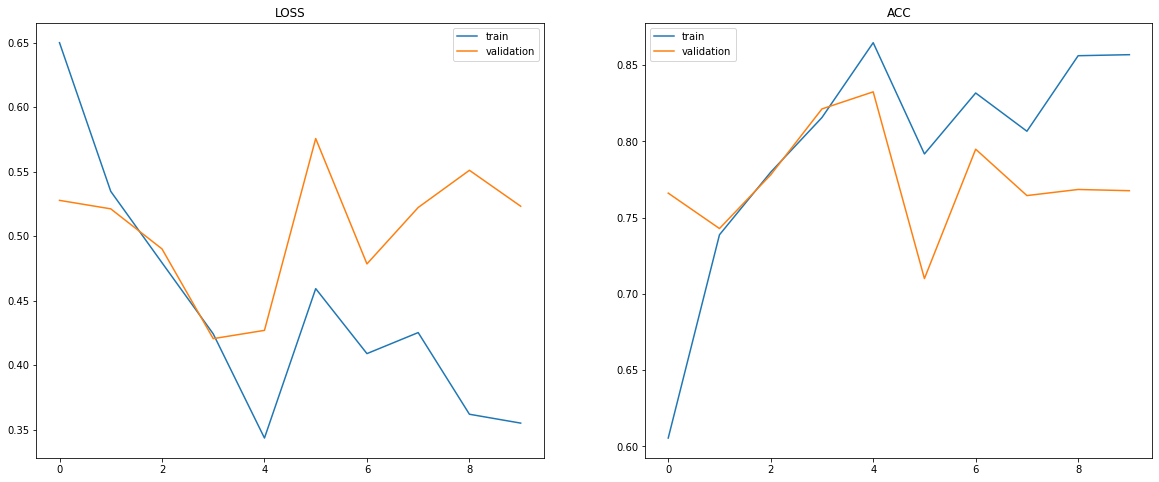

In [23]:
train_val_plot(rnn.history,10)

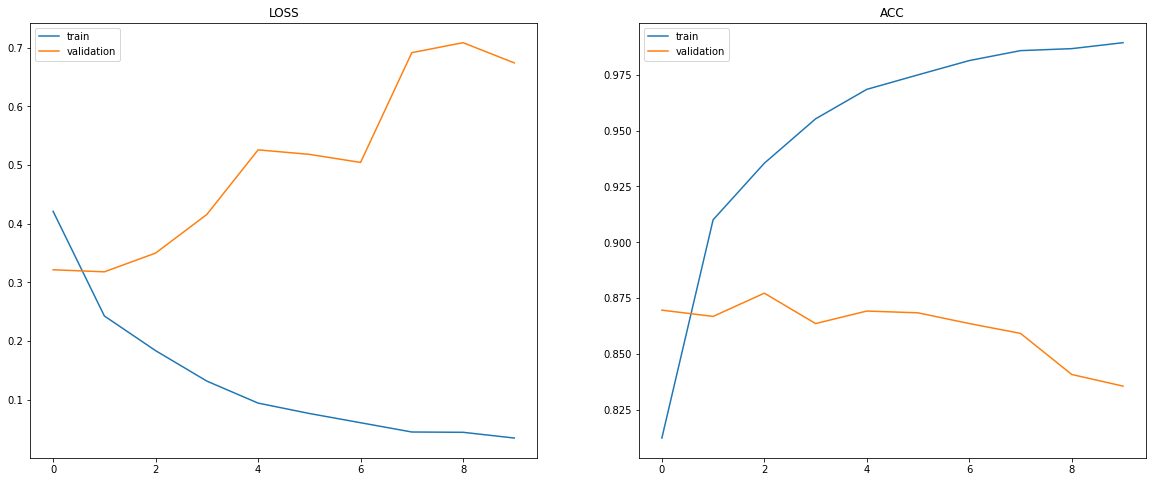

In [24]:
train_val_plot(lstm.history,10)

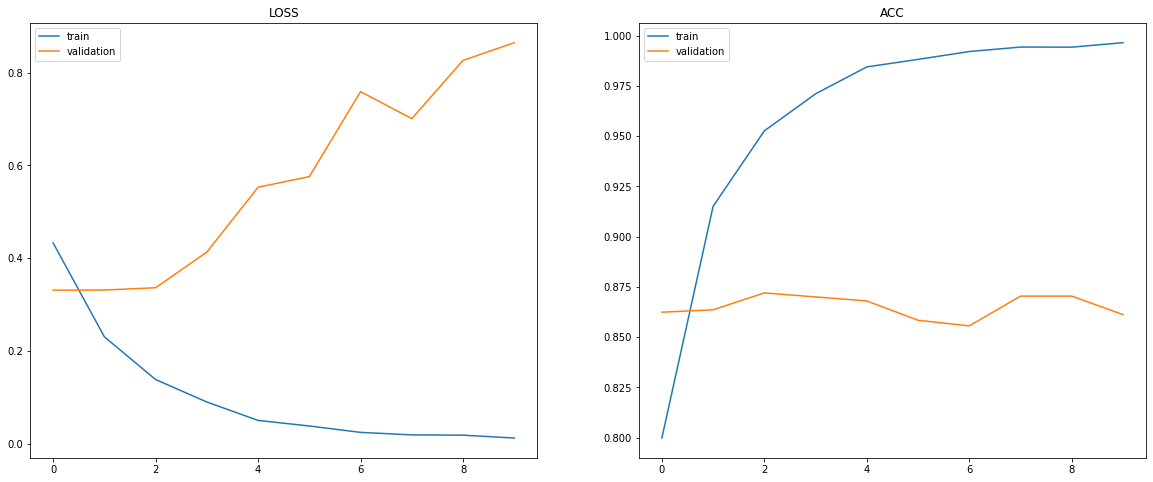

In [25]:
train_val_plot(gru.history,10)